In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(302, 14)

In [45]:
#preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


countplot of sex


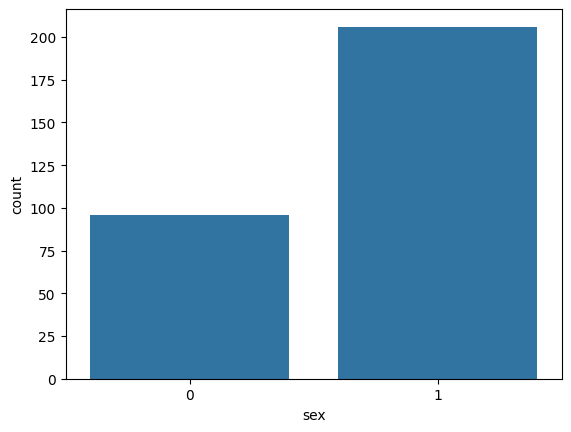


countplot of cp


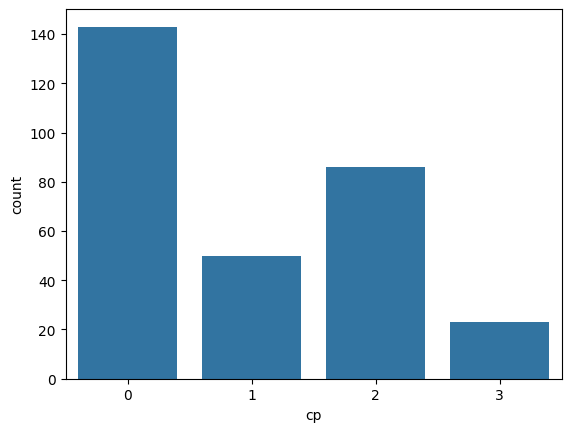


countplot of fbs


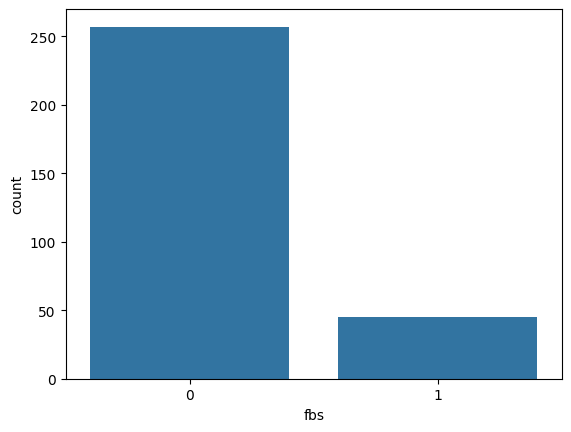


countplot of restecg


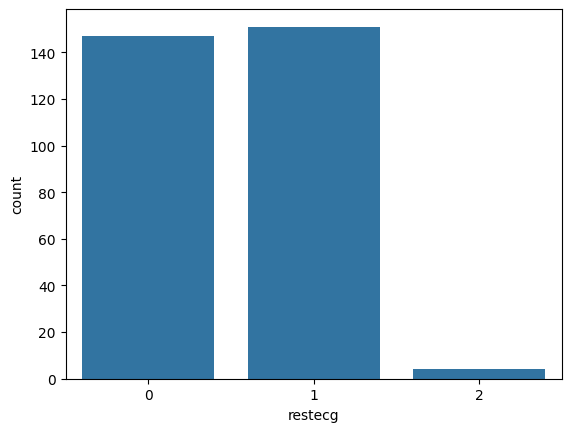


countplot of exang


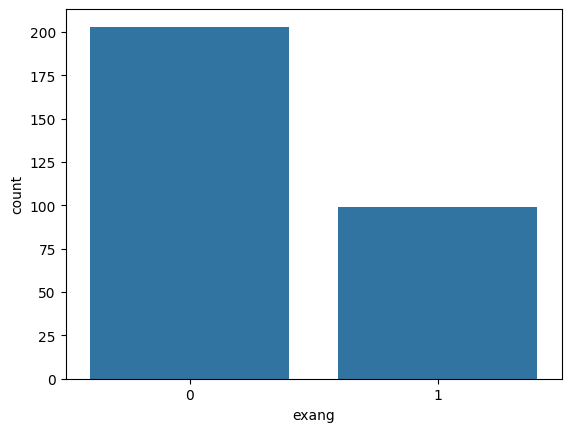


countplot of slope


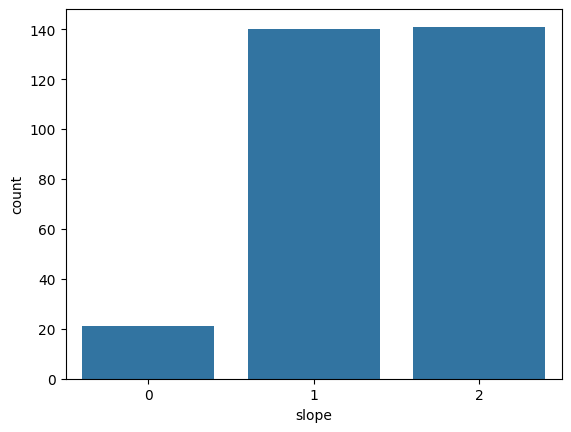


countplot of ca


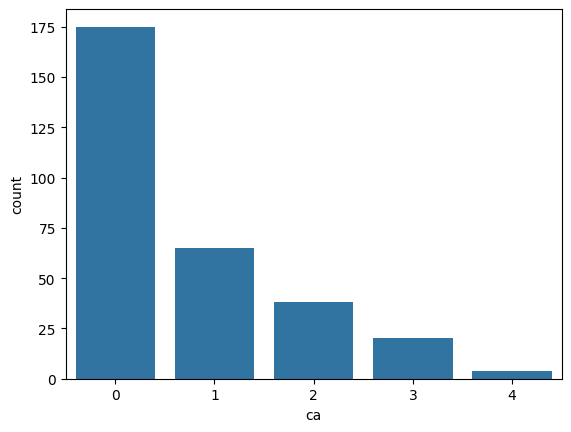


countplot of thal


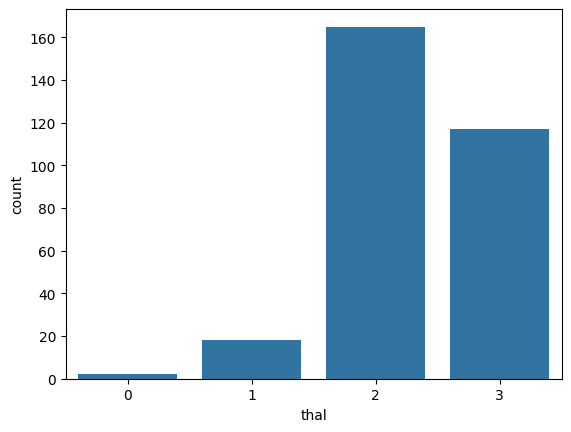


countplot of target


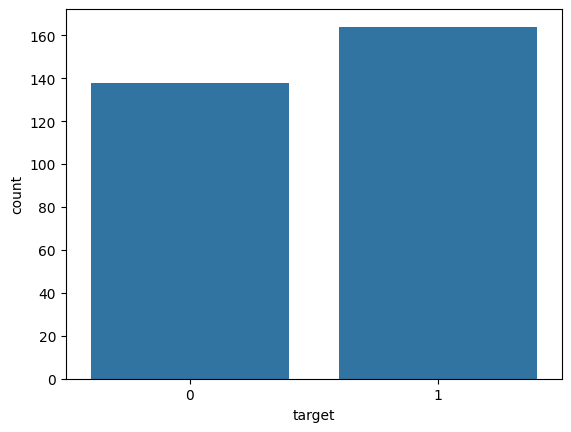

In [10]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
for i in categorical_columns:
    sns.countplot(x=df[i])
    print(f'countplot of {i}')
    plt.show()
    print()
    

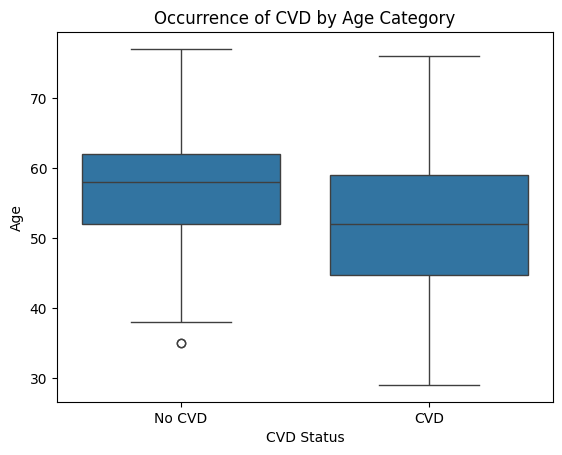

In [46]:
#the occurrence of CVD across the Age category
sns.boxplot(data=df, x="target", y="age")
plt.title("Occurrence of CVD by Age Category")
plt.xticks([0, 1], ["No CVD", "CVD"])
plt.xlabel("CVD Status")
plt.ylabel("Age")
plt.show()

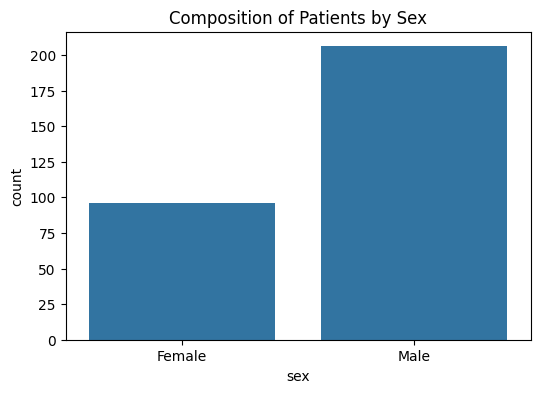

In [47]:
#the composition of all patients with respect to the Sex category
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex")
plt.title("Composition of Patients by Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

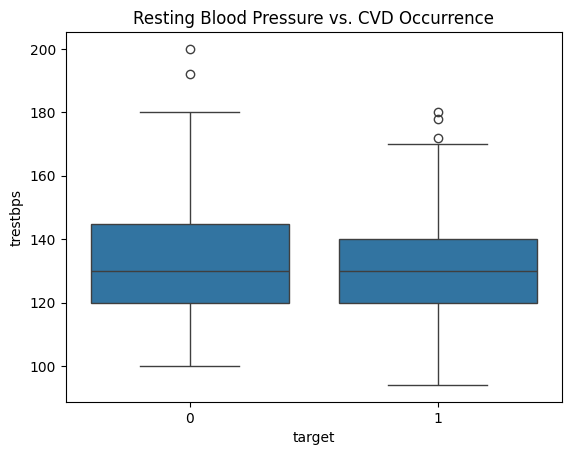

In [48]:
#if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
sns.boxplot(data=df,y="trestbps",x="target")
plt.title("Resting Blood Pressure vs. CVD Occurrence")

plt.show()

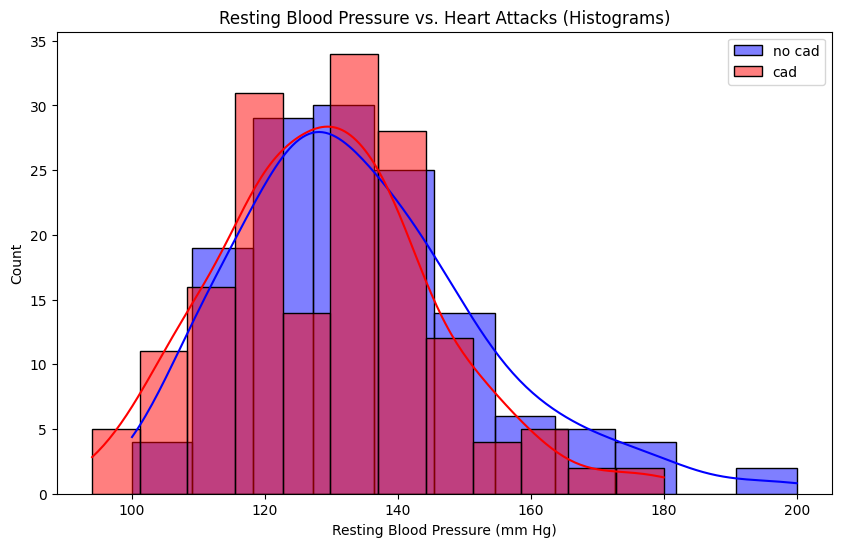

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["target"] == 0]["trestbps"], kde=True, color="blue",label="no cad")
sns.histplot(df[df["target"] == 1]["trestbps"], kde=True, color="red",label = "cad")
plt.title("Resting Blood Pressure vs. Heart Attacks (Histograms)")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.legend()
plt.show()


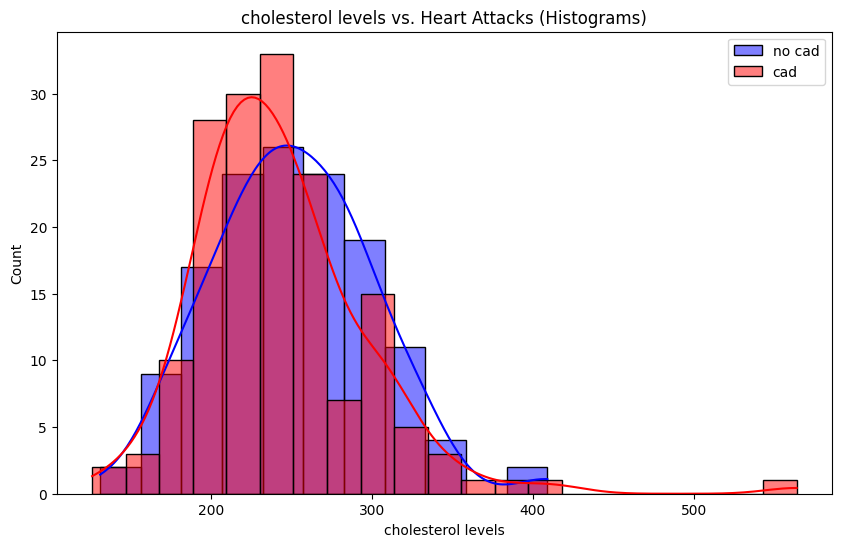

In [16]:
#Describe the relationship between cholesterol levels and a target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[df["target"] == 0]["chol"], kde=True, color="blue",label="no cad")
sns.histplot(df[df["target"] == 1]["chol"], kde=True, color="red",label = "cad")
plt.title("cholesterol levels vs. Heart Attacks (Histograms)")
plt.xlabel("cholesterol levels")
plt.legend()
plt.show()

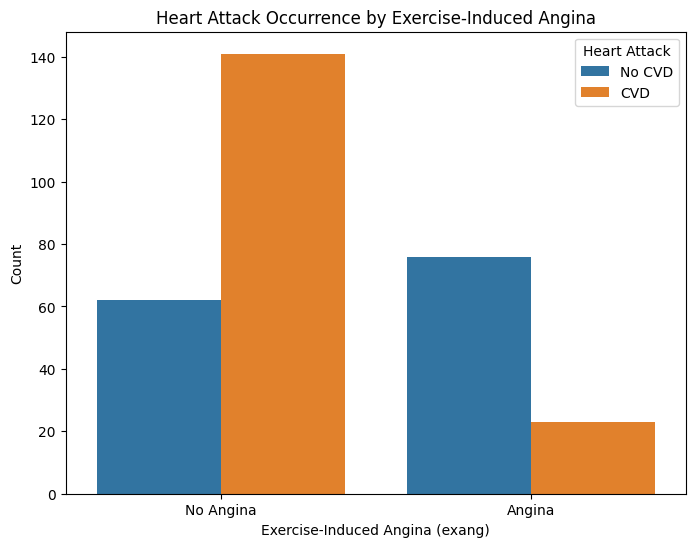

In [17]:
#what relationship exists between peak exercising and the occurrence of a heart attack
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="exang", hue="target")
plt.title("Heart Attack Occurrence by Exercise-Induced Angina")
plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Angina", "Angina"])
plt.legend(title="Heart Attack", labels=["No CVD", "CVD"])
plt.show()

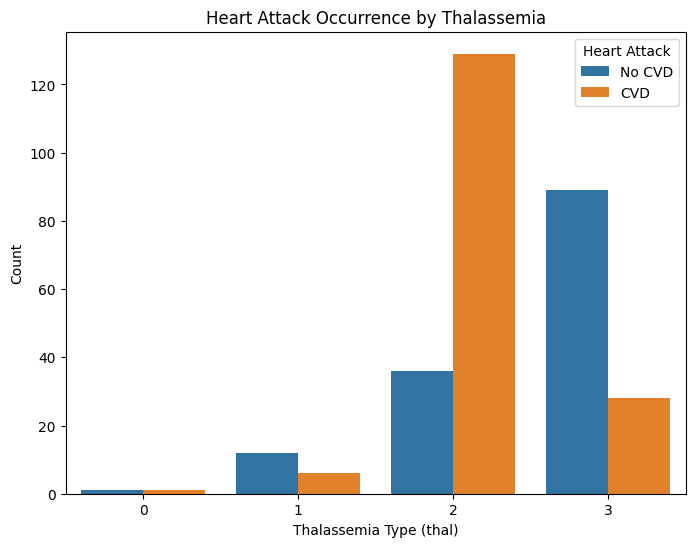

In [49]:
#Checking if thalassemia is a major cause of CVD
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="thal", hue="target")
plt.title("Heart Attack Occurrence by Thalassemia")
plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Count")
plt.legend(title="Heart Attack", labels=["No CVD", "CVD"])
plt.show()

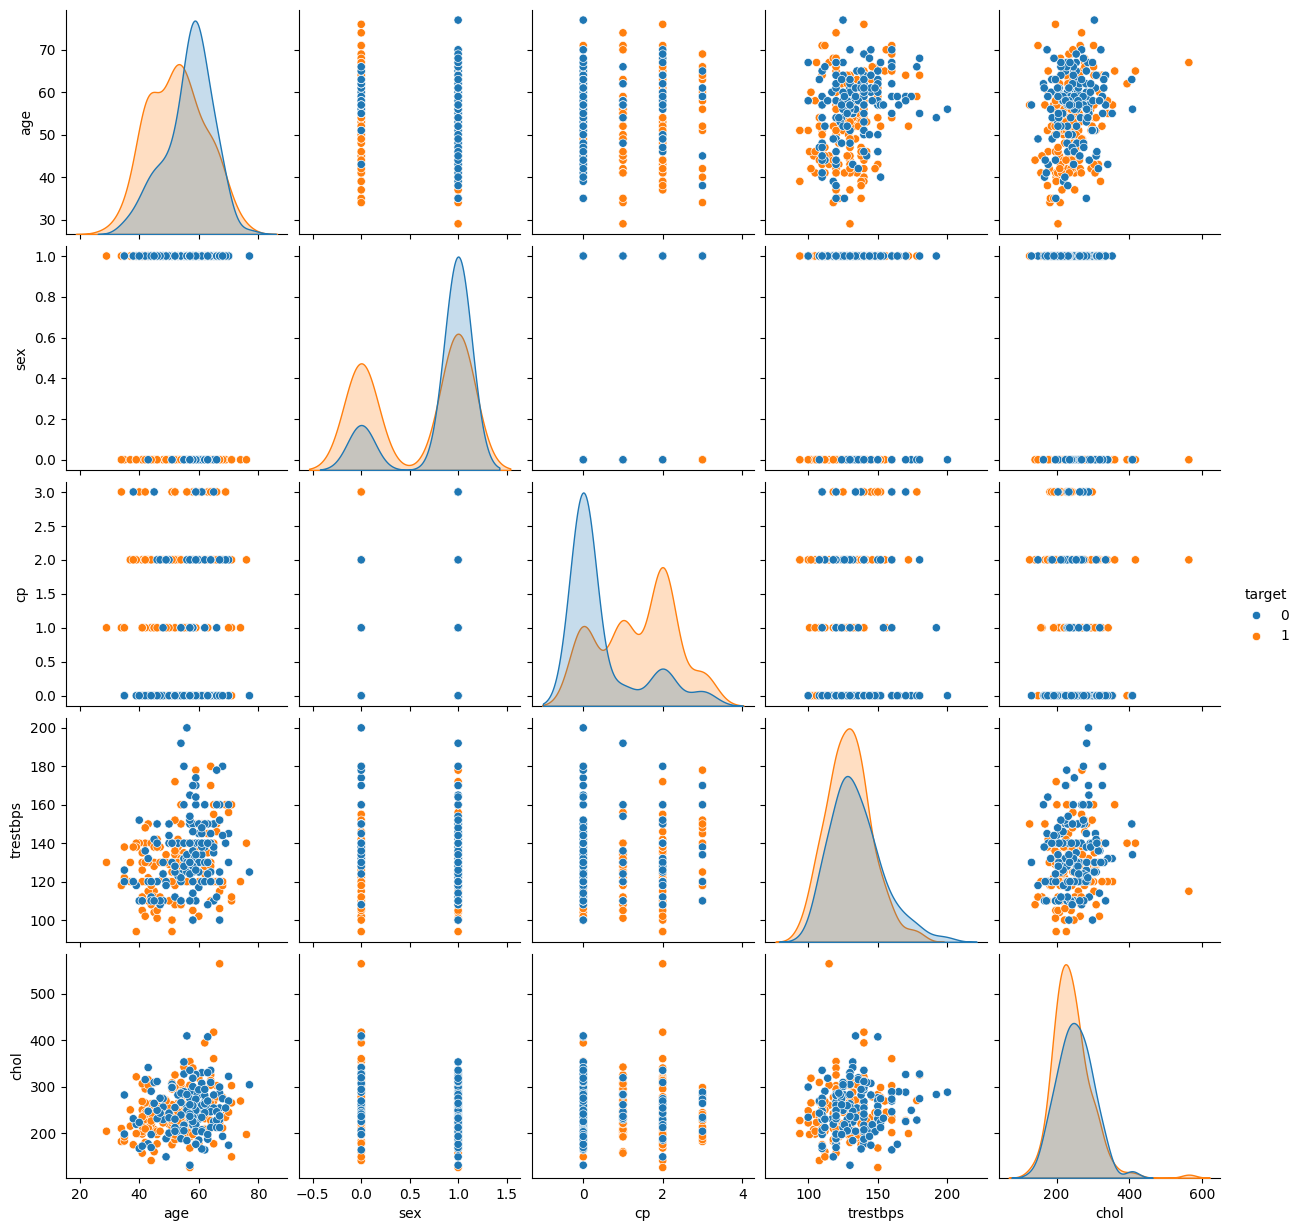

In [19]:
sns.pairplot(data=df.iloc[:,[0,1,2,3,4,13]],hue="target")
plt.show()

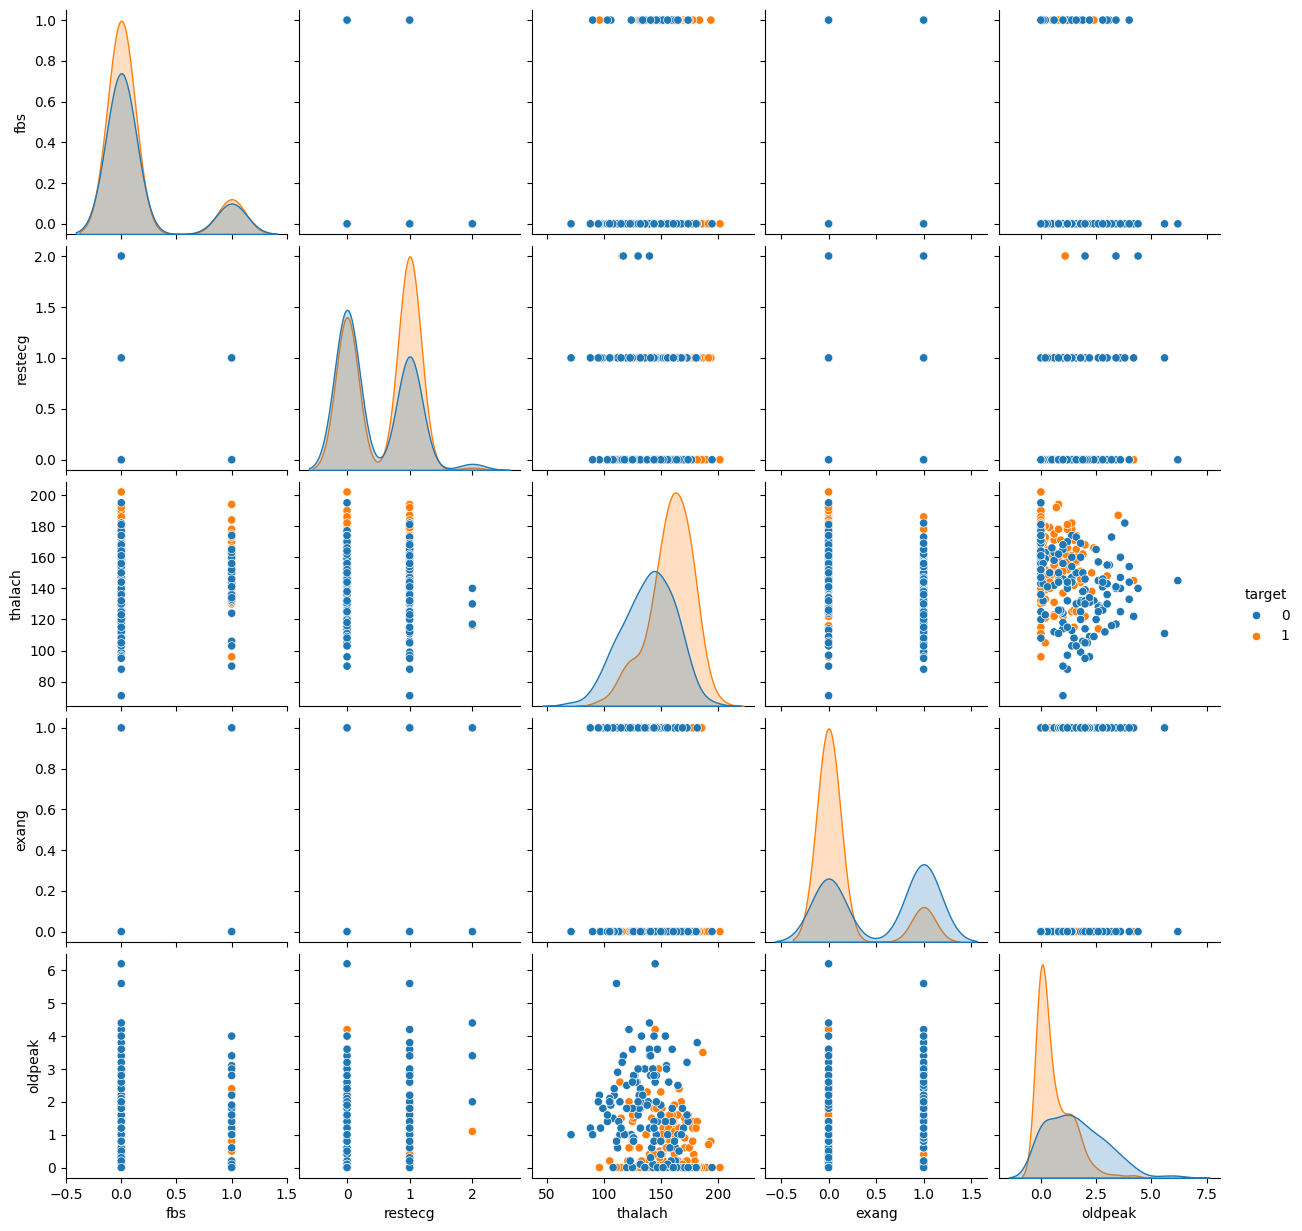

In [20]:
sns.pairplot(data=df.iloc[:,[5,6,7,8,9,13]],hue="target")
plt.show()

In [31]:
x = df.drop("target",axis=1)
y = df["target"]

### Logistic model


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
import warnings
warnings.filterwarnings("ignore")
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8524590163934426

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

### Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifier2 = RandomForestClassifier()
classifier2.fit(x_train,y_train)
pred2 = classifier2.predict(x_test)

In [42]:
accuracy_score(y_test,pred2)

0.8360655737704918

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred2)

array([[26,  3],
       [ 7, 25]], dtype=int64)